In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

In [3]:
sns.set_style("whitegrid")

In [4]:
def plot_model_comparison(
    paths: list[str], 
    labels: list[str], 
    title: str, 
    subtitle: str = None, 
    loss_indices: list[int] = None,
    include_train: bool = True,
    include_val: bool = True,
):
    if len(paths) != len(labels):
        raise Exception("Did not provide an equal number of paths and labels!")

    figsize = (12, 6) if include_train + include_val > 1 else (10, 6)
    fig, ax = plt.subplots(nrows=1, ncols=(include_train + include_val), figsize=figsize)
    if loss_indices is None: loss_indices = [0] * len(paths)

    for idx, path in enumerate(paths):
        label = labels[idx]
        checkpoint = torch.load(path, map_location=torch.device("cpu"))

        train_losses = [loss[loss_indices[idx]].item() for loss in checkpoint["train_losses"]]
        train_epochs = np.arange(1, len(train_losses) + 1)

        validation_losses = [loss[loss_indices[idx]].item() for loss in checkpoint["validation_losses"]]
        val_epochs = np.arange(1, len(validation_losses) + 1)

        if (include_train): sns.lineplot(
            x=train_epochs, 
            y=train_losses, 
            label=f"Train {label}", 
            color=f"C{idx}",
            ax=ax[0] if include_val else ax,
        )
        if (include_val): sns.lineplot(
            x=val_epochs, 
            y=validation_losses, 
            label=f"Validation {label}", 
            color=f"C{idx}",
            ax=ax[1] if include_train else ax,
        )

    if include_train + include_val > 1:
        title_axes = ax[0] if include_train + include_val > 1 else ax
        plt.text(x=0.5, y=1.025, s=title, fontsize=16, ha="center", va="bottom", transform=title_axes.transAxes)
    else:
        plt.title(title, pad=24, fontsize=16)

    if subtitle:
        subtitle_axes = ax[1] if include_train + include_val > 1 else ax
        plt.text(x=0.5, y=1.025, s=subtitle, fontsize=10, alpha=0.75, ha="center", va="bottom", transform=subtitle_axes.transAxes)

    plt.xlabel("Training Epoch #")
    plt.ylabel("Mean Epoch Loss")
    plt.legend()
    plt.show()

# Prompting

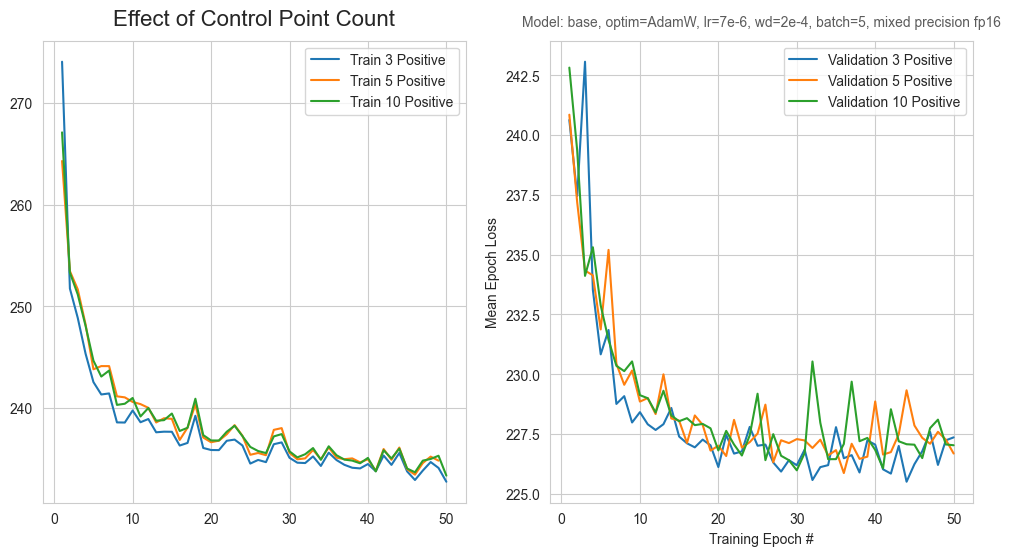

In [5]:
plot_model_comparison(
    [
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_pts_mp=fp16_3p0n.pth",
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_pts_mp=fp16_5p0n_fixed.pth",
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_pts_mp=fp16_10p0n_fixed.pth",
    ],
    ["3 Positive", "5 Positive", "10 Positive"],
    title="Effect of Control Point Count",
    subtitle="Model: base, optim=AdamW, lr=7e-6, wd=2e-4, batch=5, mixed precision fp16",
)

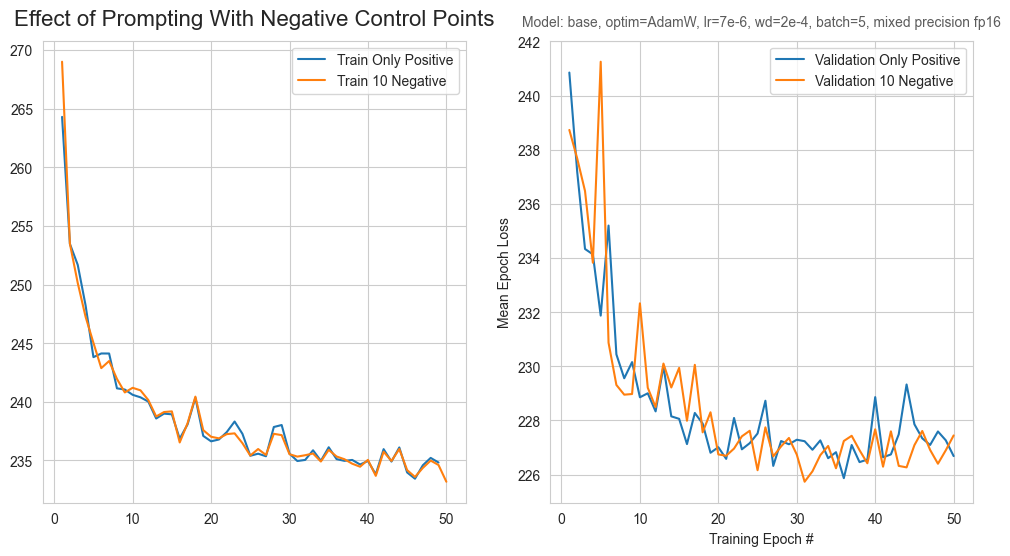

In [6]:
plot_model_comparison(
    [
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_pts_mp=fp16_5p0n_fixed.pth",
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_pts_mp=fp16_5p10n_fixed.pth",
    ],
    ["Only Positive", "10 Negative"],
    title="Effect of Prompting With Negative Control Points",
    subtitle="Model: base, optim=AdamW, lr=7e-6, wd=2e-4, batch=5, mixed precision fp16",
)

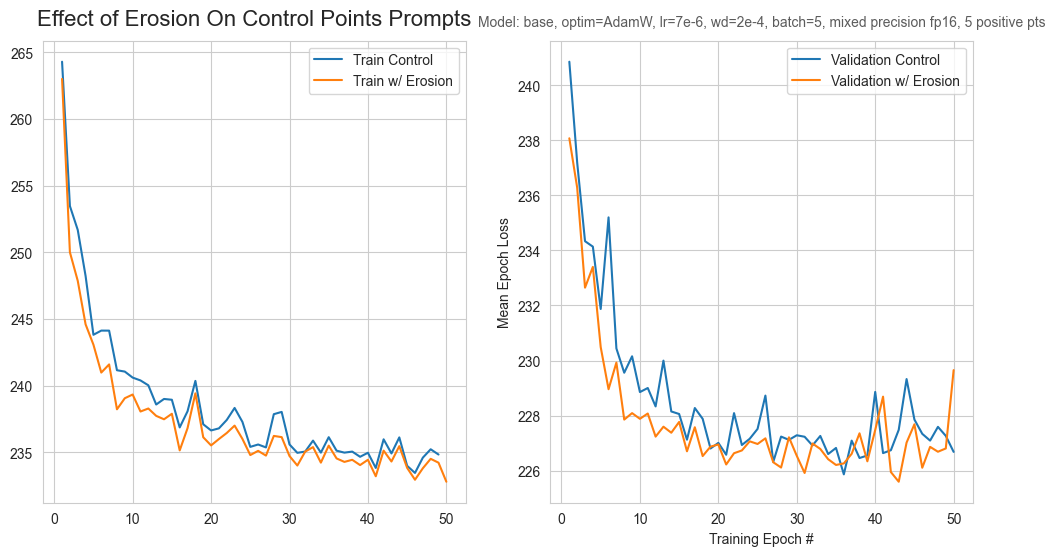

In [7]:
plot_model_comparison(
    [
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_pts_mp=fp16_5p0n_fixed.pth",
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_pts_mp=fp16_5p0n_erode_fixed.pth",
    ],
    ["Control", "w/ Erosion"],
    title="Effect of Erosion On Control Points Prompts",
    subtitle="Model: base, optim=AdamW, lr=7e-6, wd=2e-4, batch=5, mixed precision fp16, 5 positive pts",
)

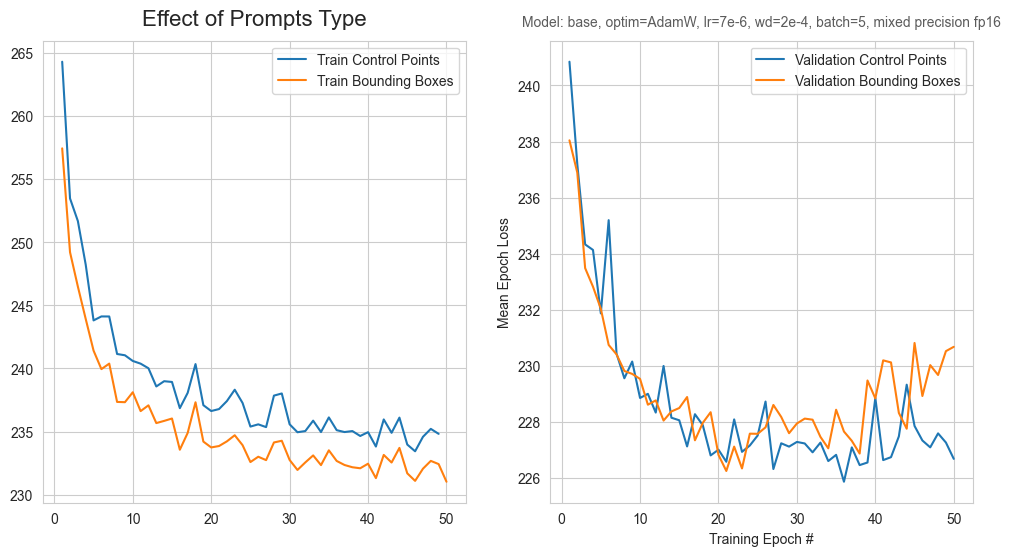

In [8]:
plot_model_comparison(
    [
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_pts_mp=fp16_5p0n_fixed.pth",
        "./prompts/base_AdamW_lr=7e-06_wd=0.0002_bs=5_mp=fp16_bbox_10_loss=dice.pth",
    ],
    ["Control Points", "Bounding Boxes"],
    title="Effect of Prompts Type",
    subtitle="Model: base, optim=AdamW, lr=7e-6, wd=2e-4, batch=5, mixed precision fp16",
)

# Loss

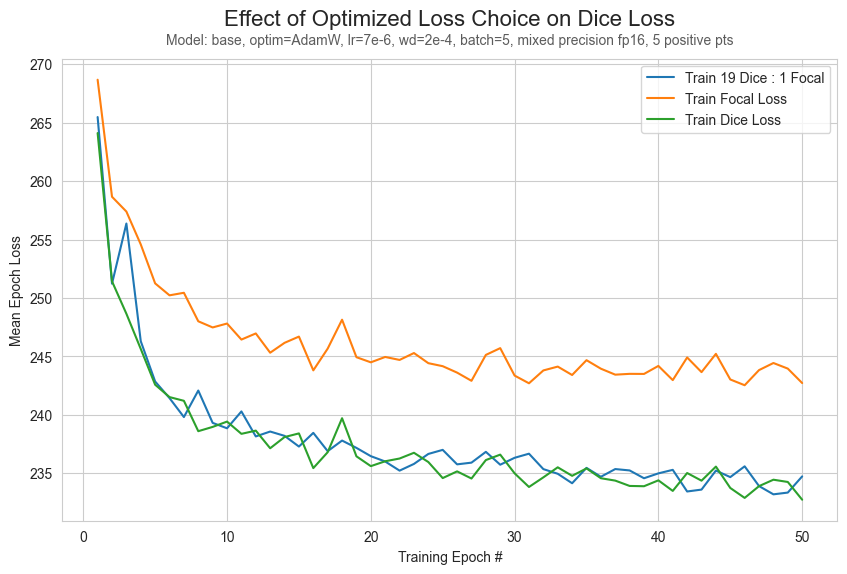

In [9]:
plot_model_comparison(
    [
        "./loss/last_base_AdamW_lr=7e-06_wd=0.0002_bs=5_mp=fp16_pts_5p0n_erode=True_loss=19-1.pth",
        "./loss/last_base_AdamW_lr=7e-06_wd=0.0002_bs=5_mp=fp16_pts_5p0n_erode=True_loss=focal.pth",
        "./loss/last_base_AdamW_lr=7e-06_wd=0.0002_bs=5_mp=fp16_pts_5p0n_erode=True_loss=dice.pth",
    ],
    ["19 Dice : 1 Focal", "Focal Loss", "Dice Loss"],
    title="Effect of Optimized Loss Choice on Dice Loss",
    subtitle="Model: base, optim=AdamW, lr=7e-6, wd=2e-4, batch=5, mixed precision fp16, 5 positive pts",
    loss_indices=[6, 6, 0],
    include_train=True,
    include_val=False,
)

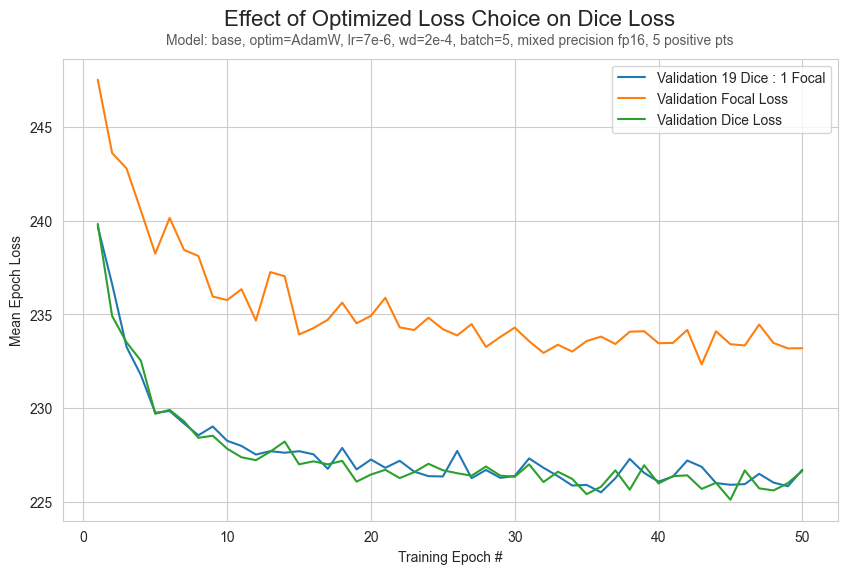

In [10]:
plot_model_comparison(
    [
        "./loss/last_base_AdamW_lr=7e-06_wd=0.0002_bs=5_mp=fp16_pts_5p0n_erode=True_loss=19-1.pth",
        "./loss/last_base_AdamW_lr=7e-06_wd=0.0002_bs=5_mp=fp16_pts_5p0n_erode=True_loss=focal.pth",
        "./loss/last_base_AdamW_lr=7e-06_wd=0.0002_bs=5_mp=fp16_pts_5p0n_erode=True_loss=dice.pth",
    ],
    ["19 Dice : 1 Focal", "Focal Loss", "Dice Loss"],
    title="Effect of Optimized Loss Choice on Dice Loss",
    subtitle="Model: base, optim=AdamW, lr=7e-6, wd=2e-4, batch=5, mixed precision fp16, 5 positive pts",
    loss_indices=[6, 6, 0],
    include_train=False,
    include_val=True,
)

# Unfinished

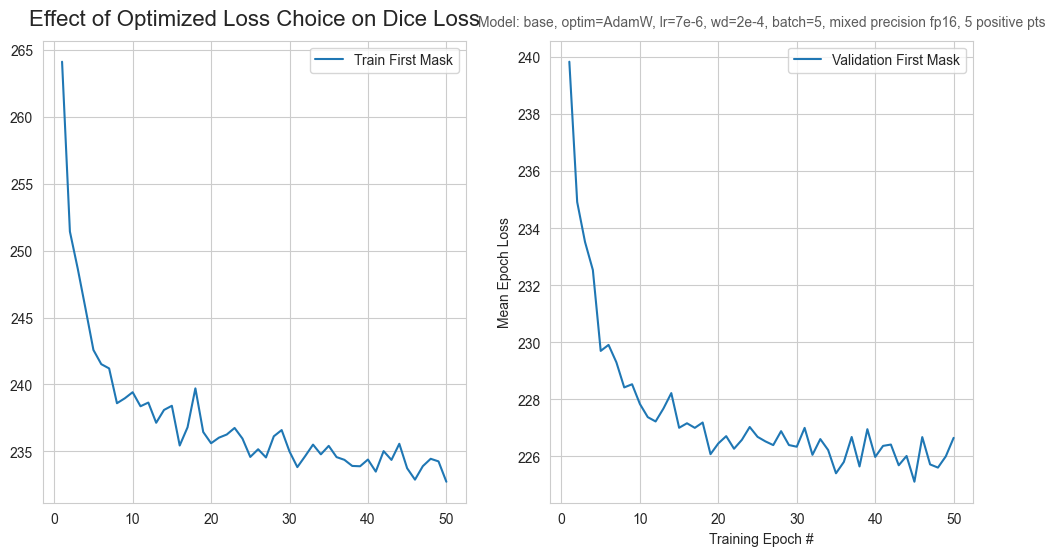

In [11]:
plot_model_comparison(
    [
        "./loss/last_base_AdamW_lr=7e-06_wd=0.0002_bs=5_mp=fp16_pts_5p0n_erode=True_loss=dice.pth",
    ],
    # ["First Mask", "Mean Mask"],
    ["First Mask"],
    title="Effect of Optimized Loss Choice on Dice Loss",
    subtitle="Model: base, optim=AdamW, lr=7e-6, wd=2e-4, batch=5, mixed precision fp16, 5 positive pts",
)